**HIERARCHICAL CLUSTERING** CRIME

In [225]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [226]:
crime=pd.read_csv("crime_data.csv")
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


EDA AND DATA PROCESSING

In [227]:
crime = crime.rename({'Unnamed: 0':'State'}, axis = 1)

In [228]:
crime.isnull().sum()

State       0
Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

AGGLOMERATIVE CLUSTERING

In [229]:
from sklearn.preprocessing import MinMaxScaler
#Normalizing Dataset
scaler=MinMaxScaler()
scaler_df=scaler.fit_transform(crime.iloc[:,1:])
print(scaler_df)

[[0.74698795 0.65410959 0.44067797 0.35917313]
 [0.55421687 0.74657534 0.27118644 0.96124031]
 [0.43975904 0.85273973 0.81355932 0.6124031 ]
 [0.48192771 0.49657534 0.30508475 0.31524548]
 [0.4939759  0.79109589 1.         0.86046512]
 [0.42771084 0.54452055 0.77966102 0.81136951]
 [0.15060241 0.22260274 0.76271186 0.09819121]
 [0.30722892 0.6609589  0.6779661  0.21963824]
 [0.87951807 0.99315068 0.81355932 0.63565891]
 [1.         0.56849315 0.47457627 0.47803618]
 [0.27108434 0.00342466 0.86440678 0.33333333]
 [0.10843373 0.25684932 0.37288136 0.17829457]
 [0.57831325 0.69863014 0.86440678 0.43152455]
 [0.38554217 0.23287671 0.55932203 0.35400517]
 [0.08433735 0.03767123 0.42372881 0.10335917]
 [0.31325301 0.23972603 0.57627119 0.27648579]
 [0.53614458 0.21917808 0.33898305 0.23255814]
 [0.87951807 0.69863014 0.57627119 0.38501292]
 [0.07831325 0.13013699 0.3220339  0.0129199 ]
 [0.63253012 0.87328767 0.59322034 0.52971576]
 [0.21686747 0.35616438 0.89830508 0.23255814]
 [0.68072289 

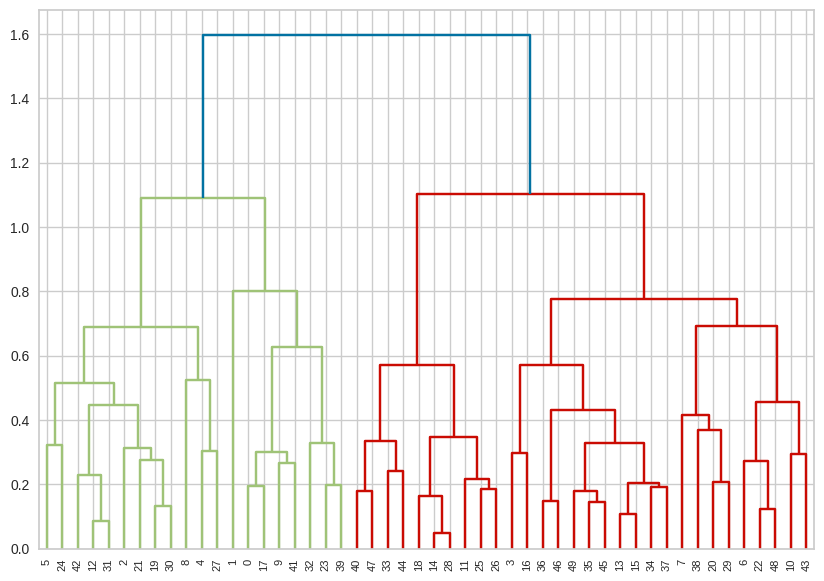

In [230]:
plt.figure(figsize=(10,7))
dendograms=sch.dendrogram(sch.linkage(scaler_df,"complete"))

In [231]:
# Creating clusters

H_clusters=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')
H_clusters

AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [232]:
y=pd.DataFrame(H_clusters.fit_predict(scaler_df),columns=['clustersid'])
y['clustersid'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


0    18
1    13
2    12
3     7
Name: clustersid, dtype: int64

In [233]:
crime["clustersid_HC"]=H_clusters.labels_
crime

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC
0,Alabama,13.2,236,58,21.2,3
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,1
9,Georgia,17.4,211,60,25.8,3


In [234]:
crime.groupby("clustersid_HC").agg(['mean']).reset_index()

<ipython-input-234-9a4f3e5d96b6>:1: FutureWarning: ['State'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  crime.groupby("clustersid_HC").agg(['mean']).reset_index()


,clustersid_HC,Murder,Assault,UrbanPop,Rape
,,mean,mean,mean,mean
0,0,6.055556,140.055556,71.333333,18.683333
1,1,10.815385,257.384615,76.000000,33.192308
2,2,3.091667,76.000000,52.083333,11.833333
3,3,14.671429,251.285714,54.285714,21.685714


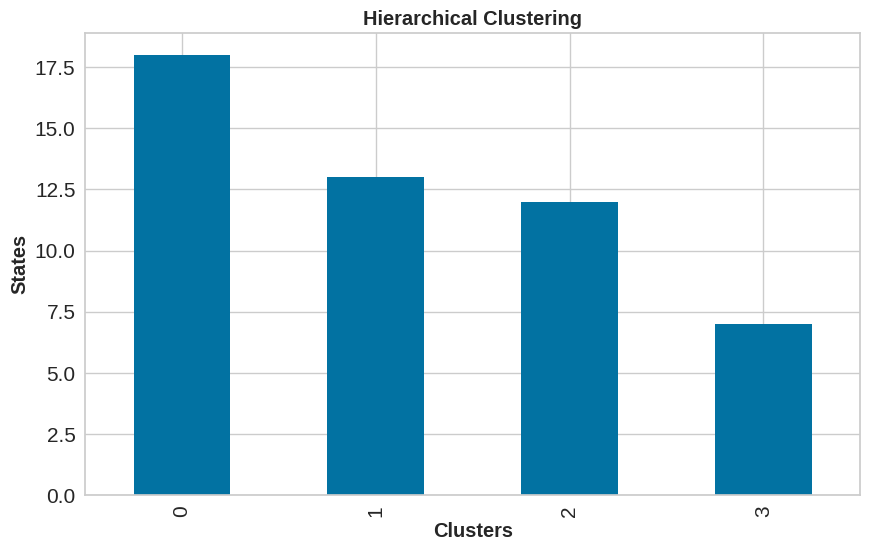

In [235]:
fig, ax = plt.subplots(figsize=(10, 6))
crime.groupby(['clustersid_HC']).count()['State'].plot(kind='bar')
plt.ylabel('States')
plt.title('Hierarchical Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('States', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [236]:
from sklearn.metrics import silhouette_score
sill_score=silhouette_score(scaler_df,H_clusters.labels_)
sill_score

0.3298707379986785

In [237]:
crime[crime["clustersid_HC"]==0]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC
3,Arkansas,8.8,190,50,19.5,0
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
10,Hawaii,5.3,46,83,20.2,0
13,Indiana,7.2,113,65,21.0,0
15,Kansas,6.0,115,66,18.0,0
16,Kentucky,9.7,109,52,16.3,0
20,Massachusetts,4.4,149,85,16.3,0
29,New Jersey,7.4,159,89,18.8,0
34,Ohio,7.3,120,75,21.4,0


In [238]:
crime[crime['clustersid_HC']==1]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC
1,Alaska,10.0,263,48,44.5,1
2,Arizona,8.1,294,80,31.0,1
4,California,9.0,276,91,40.6,1
5,Colorado,7.9,204,78,38.7,1
8,Florida,15.4,335,80,31.9,1
12,Illinois,10.4,249,83,24.0,1
19,Maryland,11.3,300,67,27.8,1
21,Michigan,12.1,255,74,35.1,1
24,Missouri,9.0,178,70,28.2,1
27,Nevada,12.2,252,81,46.0,1


In [239]:
crime[crime['clustersid_HC']==2]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC
11,Idaho,2.6,120,54,14.2,2
14,Iowa,2.2,56,57,11.3,2
18,Maine,2.1,83,51,7.8,2
22,Minnesota,2.7,72,66,14.9,2
25,Montana,6.0,109,53,16.4,2
26,Nebraska,4.3,102,62,16.5,2
28,New Hampshire,2.1,57,56,9.5,2
33,North Dakota,0.8,45,44,7.3,2
40,South Dakota,3.8,86,45,12.8,2
44,Vermont,2.2,48,32,11.2,2


In [240]:
crime[crime['clustersid_HC']==3]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC
0,Alabama,13.2,236,58,21.2,3
9,Georgia,17.4,211,60,25.8,3
17,Louisiana,15.4,249,66,22.2,3
23,Mississippi,16.1,259,44,17.1,3
32,North Carolina,13.0,337,45,16.1,3
39,South Carolina,14.4,279,48,22.5,3
41,Tennessee,13.2,188,59,26.9,3


**K MEANS CLUSTERING**

In [241]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

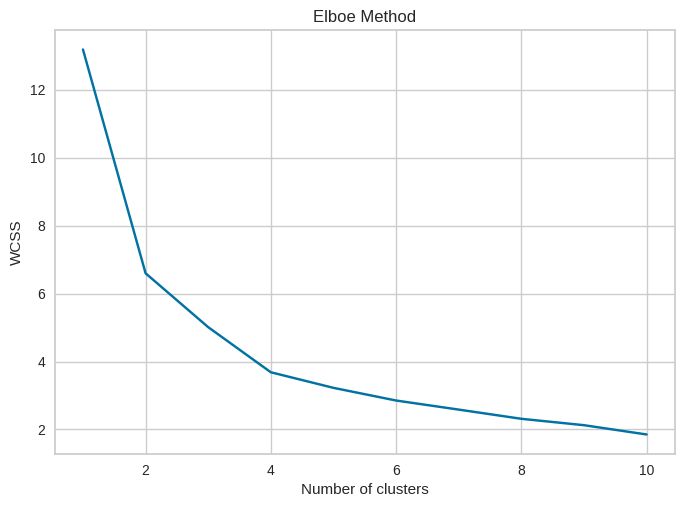

In [242]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaler_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11),wcss) 
plt.title('Elboe Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [243]:
KM_clusters=KMeans(4,random_state=42)
KM_clusters.fit(scaler_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [244]:
y=pd.DataFrame(KM_clusters.fit_predict(scaler_df),columns=['clusterid_Kmeans'])
y['clusterid_Kmeans'].value_counts()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


3    17
0    13
1    12
2     8
Name: clusterid_Kmeans, dtype: int64

In [245]:
crime['clusterid_Kmeans']=KM_clusters.labels_
crime

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans
0,Alabama,13.2,236,58,21.2,3,2
1,Alaska,10.0,263,48,44.5,1,1
2,Arizona,8.1,294,80,31.0,1,1
3,Arkansas,8.8,190,50,19.5,0,2
4,California,9.0,276,91,40.6,1,1
5,Colorado,7.9,204,78,38.7,1,1
6,Connecticut,3.3,110,77,11.1,0,3
7,Delaware,5.9,238,72,15.8,0,3
8,Florida,15.4,335,80,31.9,1,1
9,Georgia,17.4,211,60,25.8,3,2


In [246]:
crime.groupby('clusterid_Kmeans').agg(['mean']).reset_index()

<ipython-input-246-6294b2db7321>:1: FutureWarning: ['State'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  crime.groupby('clusterid_Kmeans').agg(['mean']).reset_index()


,clusterid_Kmeans,Murder,Assault,UrbanPop,Rape,clustersid_HC
,,mean,mean,mean,mean,mean
0,0,3.600000,78.538462,52.076923,12.176923,1.846154
1,1,10.966667,264.000000,76.500000,33.608333,1.000000
2,2,13.937500,243.625000,53.750000,21.412500,2.625000
3,3,5.852941,141.176471,73.647059,19.335294,0.058824


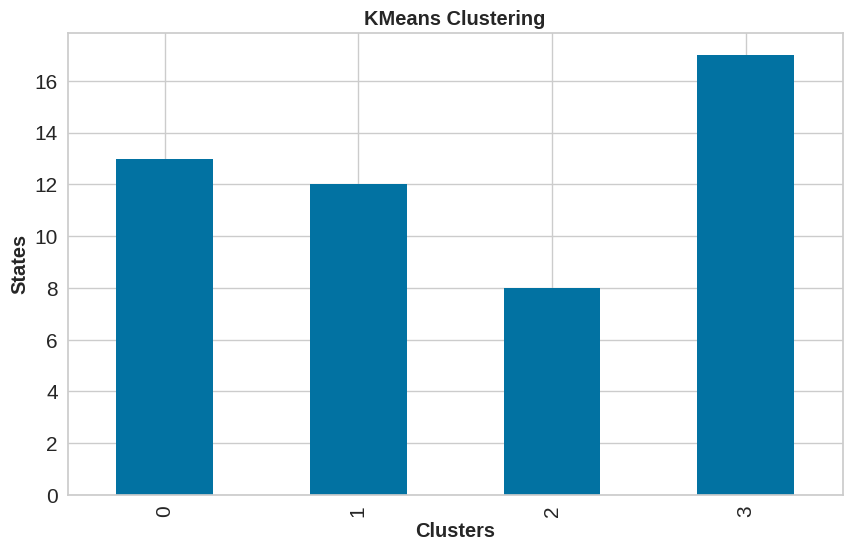

In [247]:
fig, ax = plt.subplots(figsize=(10, 6))
crime.groupby(['clusterid_Kmeans']).count()['State'].plot(kind='bar')
plt.ylabel('States')
plt.title('KMeans Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('States', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()

In [248]:
# States in cluster #0
crime[crime['clusterid_Kmeans']==0]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans
11,Idaho,2.6,120,54,14.2,2,0
14,Iowa,2.2,56,57,11.3,2,0
16,Kentucky,9.7,109,52,16.3,0,0
18,Maine,2.1,83,51,7.8,2,0
22,Minnesota,2.7,72,66,14.9,2,0
25,Montana,6.0,109,53,16.4,2,0
26,Nebraska,4.3,102,62,16.5,2,0
28,New Hampshire,2.1,57,56,9.5,2,0
33,North Dakota,0.8,45,44,7.3,2,0
40,South Dakota,3.8,86,45,12.8,2,0


In [249]:
# States in cluster #1
crime[crime['clusterid_Kmeans']==1]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans
1,Alaska,10.0,263,48,44.5,1,1
2,Arizona,8.1,294,80,31.0,1,1
4,California,9.0,276,91,40.6,1,1
5,Colorado,7.9,204,78,38.7,1,1
8,Florida,15.4,335,80,31.9,1,1
12,Illinois,10.4,249,83,24.0,1,1
19,Maryland,11.3,300,67,27.8,1,1
21,Michigan,12.1,255,74,35.1,1,1
27,Nevada,12.2,252,81,46.0,1,1
30,New Mexico,11.4,285,70,32.1,1,1


In [250]:
# States in cluster #2
crime[crime['clusterid_Kmeans']==2]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans
0,Alabama,13.2,236,58,21.2,3,2
3,Arkansas,8.8,190,50,19.5,0,2
9,Georgia,17.4,211,60,25.8,3,2
17,Louisiana,15.4,249,66,22.2,3,2
23,Mississippi,16.1,259,44,17.1,3,2
32,North Carolina,13.0,337,45,16.1,3,2
39,South Carolina,14.4,279,48,22.5,3,2
41,Tennessee,13.2,188,59,26.9,3,2


In [251]:
# States in cluster #3
crime[crime['clusterid_Kmeans']==3]

,State,Murder,Assault,UrbanPop,Rape,clustersid_HC,clusterid_Kmeans
6,Connecticut,3.3,110,77,11.1,0,3
7,Delaware,5.9,238,72,15.8,0,3
10,Hawaii,5.3,46,83,20.2,0,3
13,Indiana,7.2,113,65,21.0,0,3
15,Kansas,6.0,115,66,18.0,0,3
20,Massachusetts,4.4,149,85,16.3,0,3
24,Missouri,9.0,178,70,28.2,1,3
29,New Jersey,7.4,159,89,18.8,0,3
34,Ohio,7.3,120,75,21.4,0,3
35,Oklahoma,6.6,151,68,20.0,0,3


**DBSCAN**

In [252]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [253]:
crime=pd.read_csv('crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [254]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [255]:
dbscan = DBSCAN(eps=0.30, min_samples=4)
dbscan.fit(scaler_df)


DBSCAN(eps=0.3, min_samples=4)

In [256]:

crime['clusterid_DBSCAN']=dbscan.labels_
crime.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_DBSCAN
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,-1
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,-1


In [257]:
# States in cluster #0
crime[crime['clusterid_DBSCAN']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_DBSCAN
0,Alabama,13.2,236,58,21.2,0
9,Georgia,17.4,211,60,25.8,0
17,Louisiana,15.4,249,66,22.2,0
23,Mississippi,16.1,259,44,17.1,0
32,North Carolina,13.0,337,45,16.1,0
39,South Carolina,14.4,279,48,22.5,0
41,Tennessee,13.2,188,59,26.9,0


In [258]:
# States in cluster #1
crime[crime['clusterid_DBSCAN']==1]


,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_DBSCAN
2,Arizona,8.1,294,80,31.0,1
3,Arkansas,8.8,190,50,19.5,1
6,Connecticut,3.3,110,77,11.1,1
10,Hawaii,5.3,46,83,20.2,1
11,Idaho,2.6,120,54,14.2,1
12,Illinois,10.4,249,83,24.0,1
13,Indiana,7.2,113,65,21.0,1
14,Iowa,2.2,56,57,11.3,1
15,Kansas,6.0,115,66,18.0,1
16,Kentucky,9.7,109,52,16.3,1


In [259]:
# States in cluster #2
crime[crime['clusterid_DBSCAN']==2]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,clusterid_DBSCAN


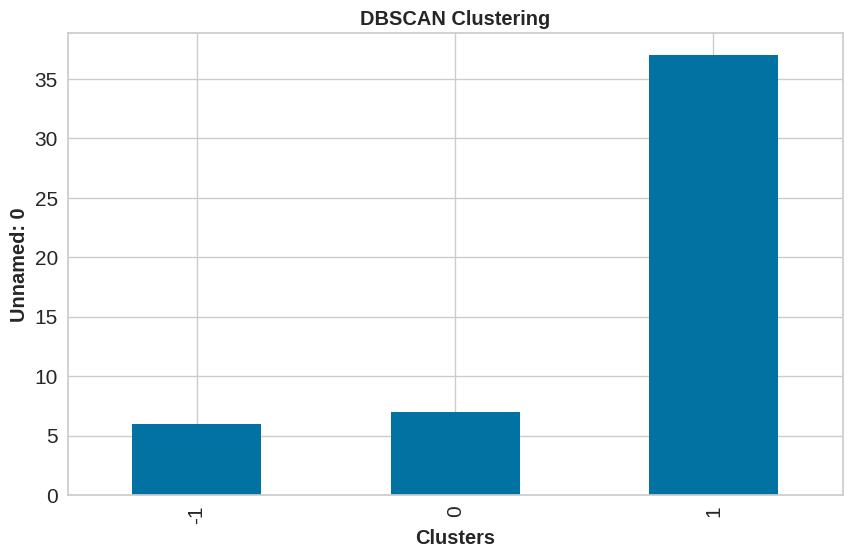

In [263]:
fig, ax = plt.subplots(figsize=(10, 6))
crime.groupby(['clusterid_DBSCAN']).count()['Unnamed: 0'].plot(kind='bar')
plt.ylabel('ID Counts')
plt.title('DBSCAN Clustering',fontsize='large',fontweight='bold')
ax.set_xlabel('Clusters', fontsize='large', fontweight='bold')
ax.set_ylabel('Unnamed: 0', fontsize='large', fontweight='bold')
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.show()


OBSERVATIONS


*   The Cities in the Cluster-0 seems to be Safe-Zone where there are relativley less Murders,Assaults and Rapes.
*   The Cities in Cluster-1 seems to have higher crime rates and can be regarded as Danger-Zone.



CONCLUSION


*   I have applied EDA to analyze dataset.Discovered correlation between diff variables and found colinearity.
* Applied Standardazation & MinMaxScalar transformation on the data   

*   I have used & analyzed two clustering techniques here..i) Hierarchical Clustering, ii)KMEANS Clustering & iii) DBSCAN.
*   By applying clustering on diff. PCA obtained with diff transformation data shows fluctuation in model score. So finally the Standard Scaler found less score so not used for further model building.

*   KMeans clustering is sensitive to outliers.
